# Project 3: Simulation of phase separation in a binary mixture

After the introductory presentation of the background for this project,
we will now dive into the mathematical and computational modeling 
of phase separation phenomena.

As a particular model for the phase separation of a binary mixture, we consider here the so-called Cahn-Hilliard equation.
The Cahn-Hilliard equation models the evolution of a mass-conservative, two-component system described by a 
(rescaled) concentrations $u(\boldsymbol{x},t) \in [-1,1]$ of component $1$ and $-u(\boldsymbol{x},t)$ of component $2$. So the entire system is rescaled
so that the total concentration is zero. 
In the literature, you will also often find a different rescaling, where the total concentration is one and two concentration
of the two components are described by $u$ and $1-u$. But for symmetry reasons, we prefer the above rescaling.



Due to mass conservation, it is sufficient to consider the evolution of the concentration of first component $u$. The resulting Cahn-Hilliard equation then reads

$$
       \partial_t u = \nabla\cdot (M \nabla \mu), 
       \quad 
       \mu =  -\kappa \Delta u + f(u)
       \quad \text{ on } \Omega \times (0,T)    
       \\
$$ (eq:cahn-hilliard-system)

where $M$ is the **mobility**, $\kappa$ is the **gradient energy coefficient**, 
and $f(u)=F'(u)=\tfrac{\mathrm{d}}{\mathrm{d}u}F(u)$ is the derivative of the **Helmholtz free energy density** $F(u)$.
Here, $\mu$ is the so-called **chemical potential**, and it can be shown
that it is the variational derivative
$$
 \mu = \dfrac{\delta \mathcal{E}}{\delta u}
$$
of the so-called **Ginzburg-Landau** free energy function
$$
\mathcal{E}(u) = \int_{\Omega} \Bigl(  \dfrac{\kappa}{2} |\nabla u|^2 + F(u)\Bigr) \;\mathrm{d}x.
$$
with respect to $u$.
For later purposes, we refer to
\begin{align}
\mathcal{E}_{\mathrm{int}}(u) = \int_{\Omega} \dfrac{\kappa}{2} |\nabla u|^2 \;\mathrm{d}x
\\
\mathcal{E}_{\mathrm{mix}}(u) = \int_{\Omega} F(u) \;\mathrm{d}x.
\end{align}
as the **interface energy** and the **mixing energy**, respectively.

We want to point out the formal similarities with heat equation 
$$
\partial_t T = -k\nabla \mathbf{q}
$$
discussed in the lecture, 
where the temperature evolution $T$  is driven by gradient
of the heat flux $\nabla \cdot \mathbf{q}$, with the heat flux given by $\mathbf{q} = -k \nabla T$ and $k$ being the heat conductivity.
From that perspective the Cahn-Hilliard equation can be considered as a nonlinear generalization of the heat equation, where a concentration flux $\mathbf{j} = - M \nabla \mu$ is driven by the gradient of the chemical potential $\mu$.
However, the complicated relation between the chemical potential $\mu$ and the concentration $u$ makes the Cahn-Hilliard equation a much more challenging problem and results in a vastly different behavior, generating solutions with complex patterns and structures.


Combining the two equations in `eq`{eq:cahn-hilliard-system} into one,
we obtain the Cahn-Hilliard equation
\begin{alignat}{2}
       \partial_t u - \nabla\cdot (M \nabla (f(u) - \kappa \Delta u )) &= 0
       & &\quad \text{ on } \Omega \times (0,T)    
       \\
       \partial_n \mu &= 0 
       & &\quad \text{ on } \Gamma \times (0,T)
       \\
       \partial_n u &= 0 
       & &\quad \text{ on } \Gamma \times (0,T)
\end{alignat}

To complete the model, we need to specify the energy density $F(u)$. Typically, $F$ is described by a double-well potential,
and from thermodynamical considerations, it is often chosen to be a logarithmic function of the form

$$
F(u) = \dfrac{\theta_c}{2}(1-u^2)- \dfrac{\theta}{2}
% \biggl[
    (1-u)
\ln\Bigl(\dfrac{1-u}{2}\Bigr) 
+ (1+u)
\ln\Bigl(\dfrac{1+u}{2}\Bigr)
% \biggr]
$$ (proj:eq:double-well-potential-log)

for $u\in(-1,1)$. The logarithmic terms correspond to the mixing entropy of the two components.
The critical temperature $\theta_c$ is the temperature above which the homogeneous mixture is stable, and below which phase separation can occur. 
At temperatures below $\theta_c$, the system tends to separate into two distinct phases to minimize its free energy.

Deriving {eq}`proj:eq:double-well-potential-log` yields

$$
f(u) = F'(u) = -\theta_c u + \dfrac{\theta}{2} \ln\Bigl(\dfrac{1+u}{1-u}\Bigr).
$$





The logarithmic terms appearing in $f(u)$ can be challenging for both the theoretical analysis and the numerical
solution of the Cahn-Hilliard equations. Consequently, $F$ is often regularized and approximated (with proper rescaling) by a polynomial double well potential of the form 
$$
F(u) = \dfrac{1}{4}(u^2 - 1)^2, \quad \text{leading to } \quad f(u) = u^3 - u.
$$ (proj:eq:double-well-potential-polynomial)
<font color='LightSkyBlue'> which we will use throughout this project and is plotted below. </font>

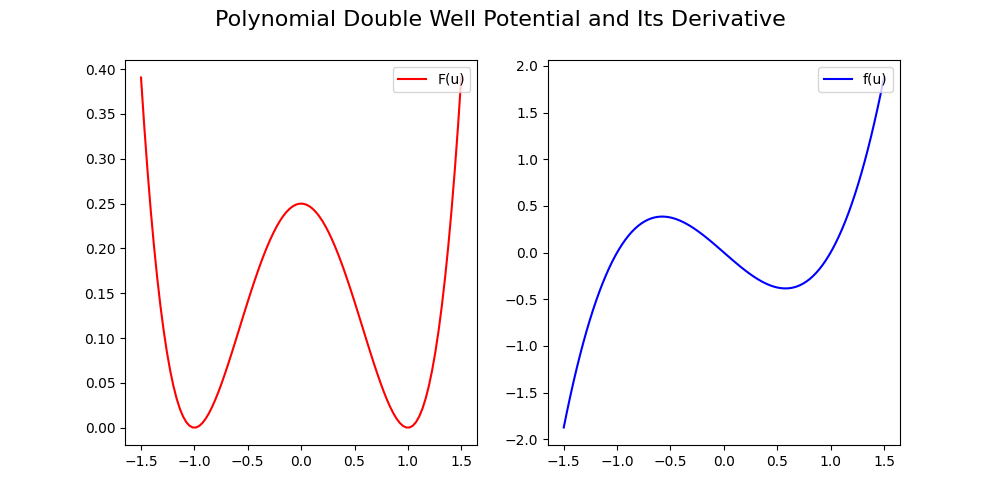

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

def F(u):
    return 0.25*(u**2-1)**2
def f(u):
    return u**3-u

x = np.linspace(-1.5, 1.5, 100)
plt.close('all')
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Polynomial Double Well Potential and Its Derivative", fontsize=16)
ax1 = fig.add_subplot(121)
ax1.plot(x, F(x), "r", label='F(u)')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(122)
ax2.plot(x, f(x), "b", label='f(u)')
ax2.legend(loc='upper right')

plt.show()


It can be shown that solutions of the Cahn-Hilliard equation drive the system towards a state of minimal energy
$\mathcal{E}(u)$.


Assuming a constant mobility $M=1$, the Cahn-Hilliard equation simplifies to

$$
% \partial_t u + \kappa \Delta^2 u - \Delta f(u) =
\partial_t u + \kappa \Delta^2 u - \Delta (u^3 - u) = 0.
$$

Here, $\Delta^2$ denotes the **biharmonic** operator, which is the square of the Laplacian operator $\Delta$,
i.e. $\Delta^2 u = \Delta (\Delta u)$.

This is a hefty PDE, as it involves fourth-order spatial derivatives, a nonlinear term, and a time derivative.
We do not discuss the well-posedness of the Cahn-Hilliard equation here which requires some sophisticated mathematical tools and techniques (
but for the mathematical inclined reader, we refer to {cite}`Miranville2019` and {cite}`BanschDeckelnickGarckeEtAl2023`).
Instead, we will focus on the numerical solution of the Cahn-Hilliard equation.

**The overall goal of this project is to gradually develop, implement and thoroughly test numerical methods for the Cahn-Hilliard equation in Python and to finally 
study the dynamics of phase separation of a binary mixture by means of numerical simulations.**



To guide you through this project and demonstrate how to develop a numerical solver for a complex PDE in a structured way, we have divided this project into 6 smaller subtasks.
In each of the tasks, you will be asked to consider simplified versions of the Cahn-Hilliard equation,
develop a corresponding numerical method while also discussing some of their theoretical properties,
and validate your implementation using carefully craft tests.
Through the series of test problems, we will  gradually add complexity to the model and the numerical methods. Afterwards you will have a (actually two!) fully functional and thorougly test solver(s) for the Cahn-Hilliard equation at hand, which you then can use to study the phase separation of a binary mixture.

The project will consists of the following tasks:
1. Before we start implementing numerical methods, we have a closer look at some of the fundamental theoretical properties of the Cahn-Hilliard, which we then later will try to observe in the numerical experiments.

2. Turning to the implementation tasks, we will start by implementing a spectral solver for the biharmonic-type problem of the form 

$$ 
\Delta^2u + c u = g
$$ 

Variants of this equation will then later solved for each time-step in a time-stepping scheme for the Cahnn-Hilliard equation.

3. Next, we will combine our spectral solver with a simple time-stepping schemes for the Cahn-Hilliard equation where we neglect the nonlinear terms for the moment. The resulting time-dependent PDE is the biharmonic cousin of the heat equation:

$$
\partial_t u + \kappa \Delta^2 u = g.
$$

4. In the next step, we will add the missing nonlinear term and consider a first-order time-stepping scheme for the full Cahn-Hilliard problem, where we discuss the challenges with and approaches for handling the non-linear term.
5. Afterwards, we will consider a more sophisticated, second-order in time method based on a 2 stage Runge-Kutta method.
 derive.
6. Finally, we will use the numerical method to study the phase separation of a binary mixture in a simple domain
more closely. We will first briefly review the known typical phenomena appearing in phase separation dynamics 
before you will be asked to conduct your own numerical experiments to study these phenomena in more detail.

**Important note**: Throughout the project, we will only consider periodic boundary conditions
for a simple domain $\Omega = [0,L_x)\times[0,L_y)$, which allows us to use Fourier spectral methods for the spatial discretization.


## Guidelines and tips for the project

* **Proper mathematical descriptions.** Before you start implementing a numerical method, **always provide a short but complete mathematical description of the method you are about to implement**. E.g. for a time-stepping method, describe in mathematical terms how you compute the solution at the next time step based on the solution at the current time step. This will help you to avoid mistakes and to understand the behavior of the method.

* **Well-documented code.** Make sure that your code is well documented,  in particular that you write a short description of the purpose of each function 
in the form of docstrings and that you provide inline comments  (1-2 lines) briefly explaining the relevant code blocks.

* **Presentation of results.** When presenting results, do not just e.g. show a picture of a solution
or display a convergence table, but make sure that you comment on
your results sufficiently, in particular when we asked guiding
questions or if the results are unexpected, or if you observe something
interesting.

* **Visualizations.** Include visualizations of your results to illustrate your findings.
You can use the plotting/animation functions provided in the `project_tools.py` module which you can find in this folder. Alternatively, you can of course use your own plotting functions. **But when you submit your final report, make sure that you remove all cell outputs
produced from the `create_animation` function** or similar animation related output. Those take a lot of 
storage and make the notebook unnecessarily large. Instead we will ask you to either provide pictures of solution snapshots or to generate a more lightweight gif animation consisting of a few frames.

    For interactive visualizations where you can zoom in/out, make animation etc. you should execute the magic command `%matplotlib widget` once somewhere in the beginning of the notebook. But when you generate the final 
    report, switch back to `%matplotlib inline` to avoid large notebook files/storage of animations.
    Finally, if you use `%matplotlib widget` in conjunction with Vscode, you sometimes might run into problems with the plots not showing up. This happens when too many figures have been instantiated.
    Best course of action is then to restart Vscode, simply resetting the output cells and kernel of the notebook won't help.

* **Use of AI.** Please document your use of AI tools in your project properly by filling out the AI declaration form
you can find on NTNU's internal wiki, either in 
[English](https://i.ntnu.no/documents/portlet_file_entry/1305837853/2024+KI_Skjema__EN.pdf/6730c97b-1701-c77f-6e36-af1bef7b02d8), 
[Norwegian (Bokmål)](https://i.ntnu.no/documents/portlet_file_entry/1305837853/2024+KI_Skjema__BM.pdf/b431606b-7b16-f9e9-bb1b-19d16bcfaa19) or 
[Norwegian (Nynorsk)](https://i.ntnu.no/documents/portlet_file_entry/1305837853/2024+KI_Skjema__NN.pdf/3c430618-ad33-91c2-af20-125ac0122df2). The form should be submitted in addition the final report.
Obviously, we can not and will not put an restrictions on how you use AI tools in your project, 
but we would like to know if/how you used them and what you used them for, and how you made sure that 
AI generated results are reliable.
The form should be submitted with the final report. 
Download the AI declaration form for technical and science subjects

* **Submission.** As before, the final report should be submitted as a single Jupyter notebook which has been executed from start to finish. The notebook should contain all relevant code, results, and discussions. Make sure that the code has been completely executed without errors and that the results are displayed in the notebook.   